In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL

from mac0460_5832.utils import *

# MAC0460/5832 - List 1: Learning W-Operators

### Due date: 23h55m - 05/05/2017


Q1. Using the techniques to learn w-operators, find a 1x3 (1 row, 3 columns) operator capable of transforming the image src1 into dest1 (see the variables below) and print the pattern table found. Test your operator on src1 and verify that it works as expected. Test your operator on the images images/q1/1_test1.png and images/q1/1_test2.png plotting the transformed image (suggestion: use the function draw_img from mac0460_5832/utils.py).

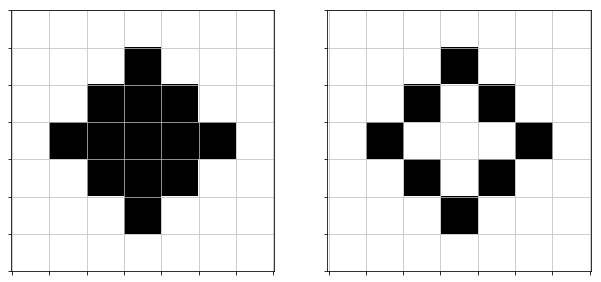

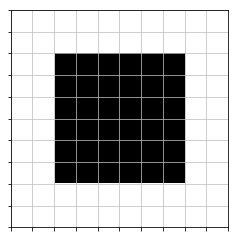

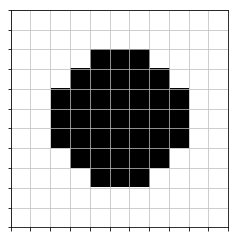

In [10]:
src1 = read_img('images/q1/1_src.png')
dest1 = read_img('images/q1/1_dest.png')

draw_img_pair(src1, dest1)

test1_1 = read_img('images/q1/1_test1.png')
test1_2 = read_img('images/q1/1_test2.png')
draw_img(test1_1)
draw_img(test1_2)

Q2. Apply the learning algorithm to get a 3x3 W-Operator capable of detecting borders. Train your operator using the images inside the folder images/q2, using the pairs (q2_src\*.png, q2_dest\*.png). Test your operator on the images images/q2/q2_test.png and images/q2/q2_test2.png. Some of the training images are plotted below.

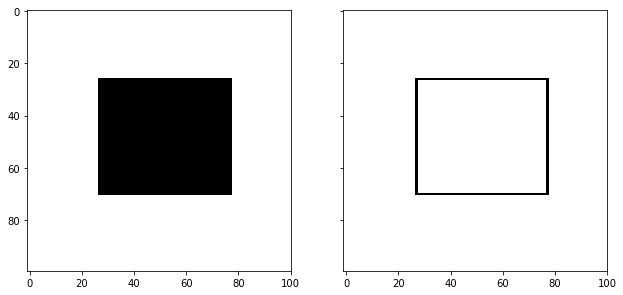

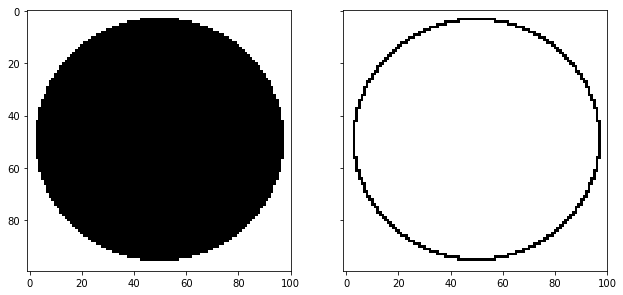

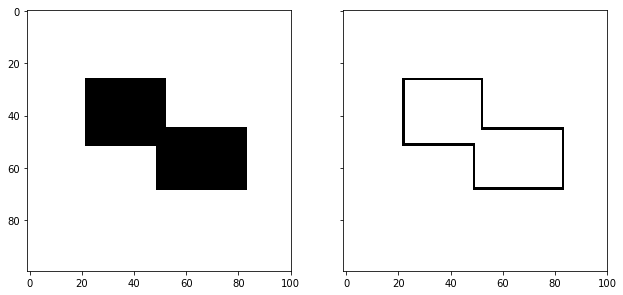

In [9]:
src2_1 = read_img('images/q2/q2_src1.png')
src2_2 = read_img('images/q2/q2_src2.png')
src2_3 = read_img('images/q2/q2_src3.png')

dest2_1 = read_img('images/q2/q2_dest1.png')
dest2_2 = read_img('images/q2/q2_dest2.png')
dest2_3 = read_img('images/q2/q2_dest3.png')


draw_img_pair(src2_1, dest2_1)
draw_img_pair(src2_2, dest2_2)
draw_img_pair(src2_3, dest2_3)

Q3. Learn a w-operator capable of filtering noise. Use the training images images/q3/q3_src\*.png and the target images/q3/q3_dest.png. Try using a window of 5 elements (cross). Test the resulting operator on the images images/q3/q3_test1.png and images/q3/q3_test2.png and compute the error.

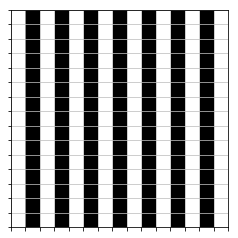

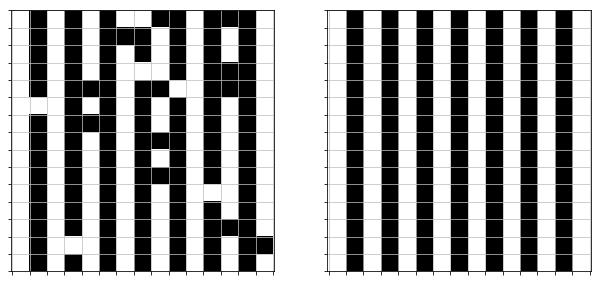

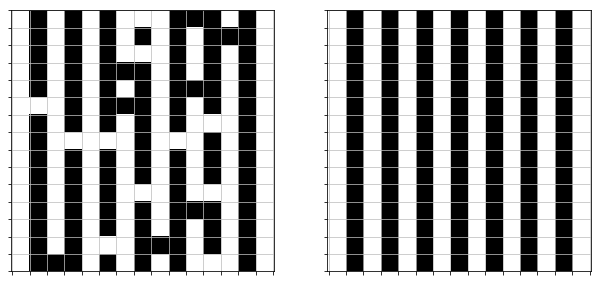

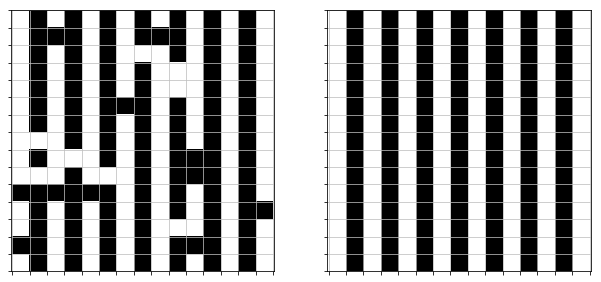

In [4]:
src3_1 = read_img('images/q3/q3_src1.png')
src3_2 = read_img('images/q3/q3_src2.png')
src3_3 = read_img('images/q3/q3_src3.png')
src3_4 = read_img('images/q3/q3_src4.png')
dest3 = read_img('images/q3/q3_dest.png')

draw_img(dest3)

draw_img_pair(src3_1, dest3)
draw_img_pair(src3_2, dest3)
draw_img_pair(src3_3, dest3)

Q4. Apply the learning algorithm to extract the letter 's' from images of the texts. Use the pairs of images (q4_src\*.png, q4_dest\*.png) from the folder images/q4/train. Test your operator on the images in images/q4/test. In this exercise, use the composition of small windows. Compare your results with the expected output (ground truth images q4_gt\*.png in images/q4/test).

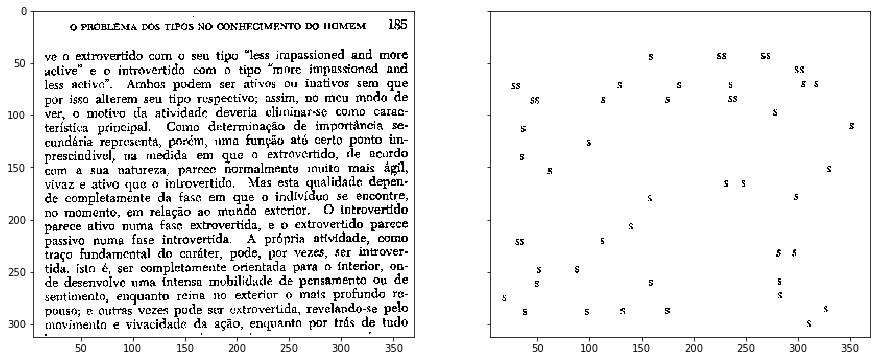

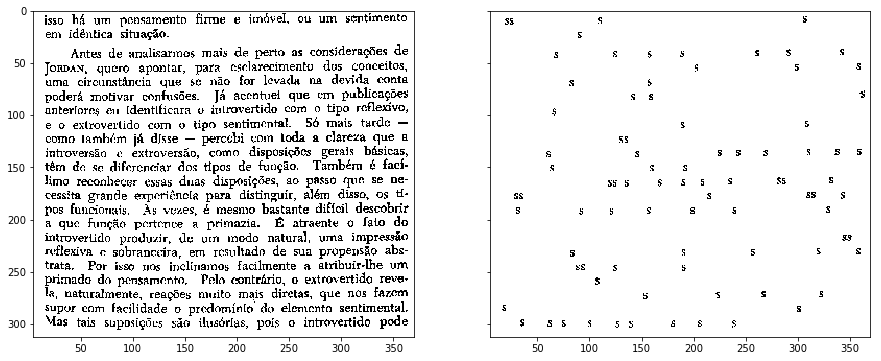

In [5]:
dest4_1a = read_img("images/q4/train/q4_dest1a.png")
src4_1a = read_img("images/q4/train/q4_src1a.png")
dest4_1b = read_img("images/q4/train/q4_dest1b.png")
src4_1b = read_img("images/q4/train/q4_src1b.png")
draw_img_pair(src4_1a, dest4_1a, figsz=(15, 6))
draw_img_pair(src4_1b, dest4_1b, figsz=(15, 6))

Q5. Using multiresolution approach to w-operator learning, find an operator to filter the images in images/q5/. Using the pair of images (q5_src\*.png, q5_dest.png) for training and then test your operator on images q5_test1.png e q5_test2.png.

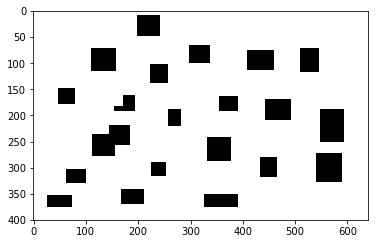

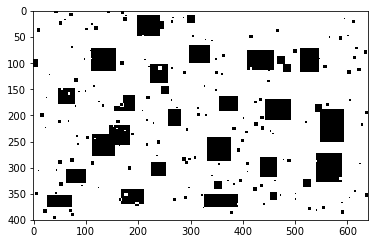

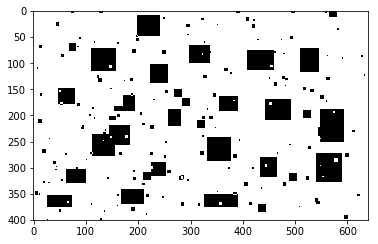

In [11]:
dest5 = read_img("images/q5/q5_dest.png")
src5_1 = read_img("images/q5/q5_src1.png")
src5_2 = read_img("images/q5/q5_src2.png")
draw_img(dest5)
draw_img(src5_1)
draw_img(src5_2)

Q6. Apply the envelope technique to learn a w-operator capable of filtering noise. Use the same data from the previous exercise and morphology functions in mac0460_5832/utils.py to define the functions  $\alpha$ and $\beta$. An example of morphological erosion is shown below. Comment on the choice of the functions $\alpha$ and $\beta$.

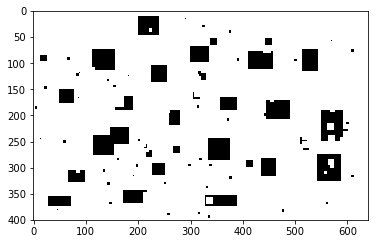

In [12]:
src6_1 = read_img("images/q5/q5_src1.png")
draw_img(erosion(src6_1, se_box(2)))

Q7. Mix multiresolution and envelope techniques to learn an operator capable of filtering noise. For each window from multiresolution, define functions $\alpha$ and $\beta$ (you might use different functions). Compare the result obtained to the ones in the previous questions.

Q8. The function gen_rand_imgs below returns a pair of images. The first one is random and the second one is obtained after apply dilation on the first one (cross structuring element). Apply the learning algorithm to automatically learn an operator capable of doing this trasformation. Generate the training data based o the equation $m(\epsilon, \delta, H) = \frac{1}{\epsilon}ln\frac{|H|}{\delta}$ calling to gen_rand_imgs multiple times. Compare the accuracy of your classifier (generate more pairs of images and evaluate $E_{out}$ based on them) for values of $\epsilon = [0.2, 0.1]$ and $\delta = [0.3, 0.2]$.

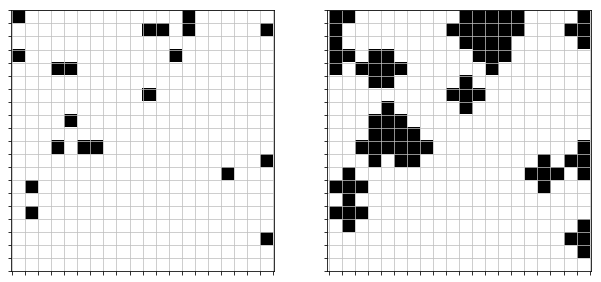

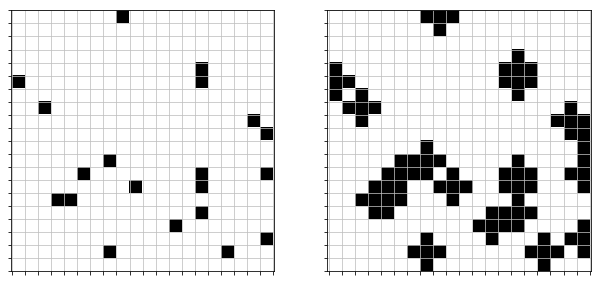

In [8]:
def gen_rand_imgs():
    noise = np.zeros((20, 20)).astype(bool)
    num_pixels = 20
    x = np.random.randint(0, 20, num_pixels)
    y = np.random.randint(0, 20, num_pixels)

    for i in range(num_pixels):
        noise[x[i], y[i]] = 1

    return noise, dilation(noise, se_cross(1))

src5_1, dest5_1 = gen_rand_imgs()
src5_2, dest5_2 = gen_rand_imgs()
draw_img_pair(src5_1, dest5_1)
draw_img_pair(src5_2, dest5_2)